# RGB色空間で画像を取り扱う

RGB色空間では混合色が使われいます。RGB色空間は人間の目に見える色空間の大部分をほうがんする為、日常生活において役立ちます。このため、カラーテレビやカラーコンピュータ用のモニタでは、赤、緑、青の混合光を生成するだけでいいのです。
<br>
いまｋらOpenCVというライブラリを使用しますが,Opencvではカラー画像がBGR画像として保存されます。つまりカラーチャンネルが青、緑、赤となります

必要なライブラリをコンテナにインストールします。

In [2]:
!pip install --upgrade pip
!pip install opencv-python

     |████████████████████████████████| 1.5MB 1.7MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 28.2 MB 4.9 kB/s eta 0:00:01██▌                   | 11.0 MB 6.0 MB/s eta 0:00:03     |████████████████████████▊       | 21.7 MB 201 kB/s eta 0:00:32��██████████████▊   | 25.3 MB 5.6 MB/s eta 0:00:01��█████████████████████████▋  | 26.1 MB 5.6 MB/s eta 0:00:01�██▋| 27.9 MB 123 kB/s eta 0:00:03


画像を読み込み表示します

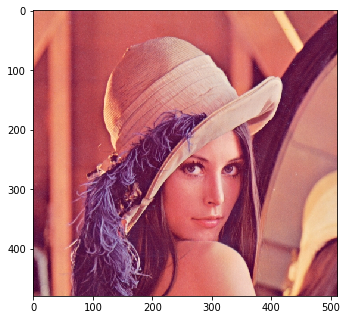

In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


img_bgr = cv2.imread("./lenna.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img_rgb)

# 局所特徴

基本的に画像認識をするためには、画像の特徴がひつようになり、画像の中に移っている「局所特徴」をとらえることで様々な画像認識を行うことができます。<br>

局所特徴とは、点、エッジ、小さいイメージ パッチなど、イメージ内に見られるパターンや際立つ構造のことを指します。これらは通常、テクスチャ、色、強度などが周辺と異なるイメージ パッチに関連付けられます。ここでは特徴が実際に表している対象物ではなく、周りとは異なるという点が重要です。局所特徴の例としては、ブロブ、コーナー、エッジ ピクセルなどが挙げられます。

# 画像のエッジ検出

エッジという言葉は「縁」の意味があります。
例えば、白い壁の部屋に黒い犬が映った画像では、犬の黒色と背景の白色の区別ができれば犬を検出できます。<br>

"色が黒の部分だけ抜き出す"みたいなプログラムをかければ、認識が完了しますがこれだとほかの画像では使えそうにありません。
そこで、もっとものの輪郭(エッジ)を認識する方法はないかと考えてみます。
するといろいろな画像で物体の輪郭（エッジ）という特徴を調べることができます。<br>

この技術の１つが「エッジ検出」になります.
では、画像のエッジを検出してみたいと思います。

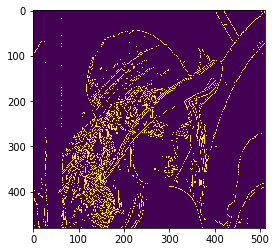

In [14]:
edges = cv2.Canny(image=img_rgb, threshold1=127, threshold2=127)
plt.imshow(edges)

# 画像中のコーナーを検出する
画像内で見つけやすい最も簡単な特徴の１つはおそらくコーナーです。
それでは上の画像のコーナーを検出してみたいと思います。

# Harrisコーナー検出
エッジがあらゆる方向に高い輝度変化を持つ領域であると想定し、Harrisとstephensはこのような領域を素早く見つける方法を思いつきました。
今回はHarrisコーナー検出と呼ばれる手法を使用してみようと思います.

<br>
harrisコーナー検出はグレースケール画像上でのみ機能するので最初の画像をグレースケール画像に変換します。<br>
その後入力画像とコーナー検出のために考慮される近傍画素の範囲、エッジ検出のためのウィンドウサイズ、そしていわゆるHarris検出フリーパラメーターをアルゴリズムに入力します。
その後、得られた特徴量をプロットします。

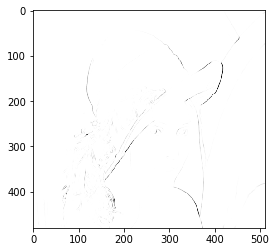

In [9]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
corrers = cv2.cornerHarris(img_gray, 2, 3, 0.4)
plt.imshow(corrers, cmap='gray')